In [1416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [1417]:
df = pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [1418]:
df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [1419]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [1420]:
df.shape

(1525, 9)

In [1421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [1422]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1424]:
df.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [1425]:
df.gender.value_counts(normalize=True)

female    0.532459
male      0.467541
Name: gender, dtype: float64

In [1423]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [911]:
df[df.duplicated()==True]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


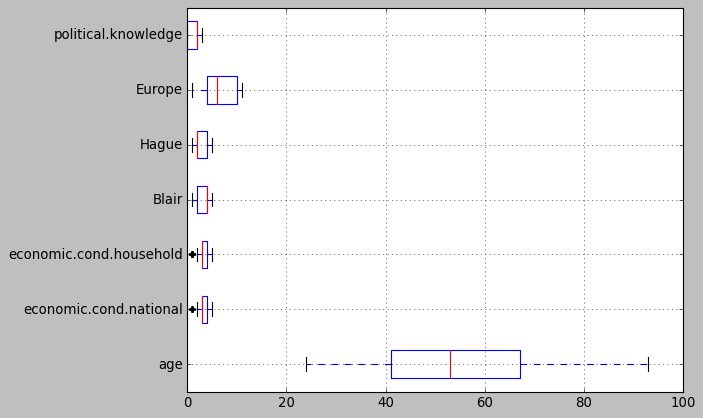

In [912]:
df.boxplot(vert=0)

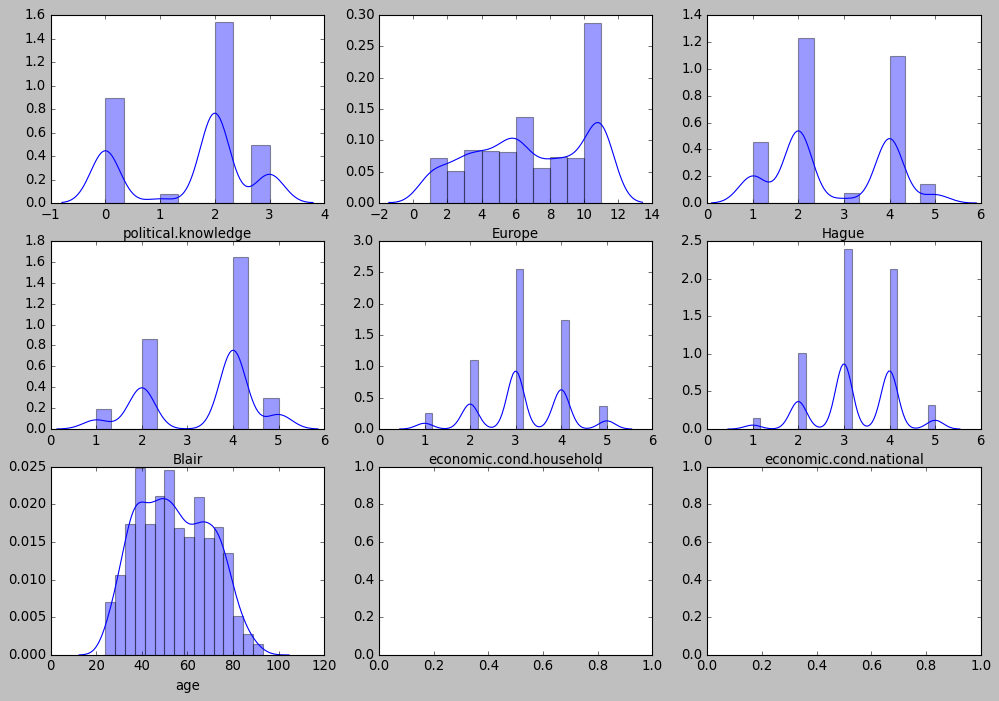

In [913]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
sns.distplot(df['political.knowledge'],ax=axes[0,0])
sns.distplot(df['Europe'],ax=axes[0,1])
sns.distplot(df['Hague'],ax=axes[0,2])
sns.distplot(df['Blair'],ax=axes[1,0])
sns.distplot(df['economic.cond.household'],ax=axes[1,1])
sns.distplot(df['economic.cond.national'],ax=axes[1,2])
sns.distplot(df['age'],ax=axes[2,0])
plt.show()

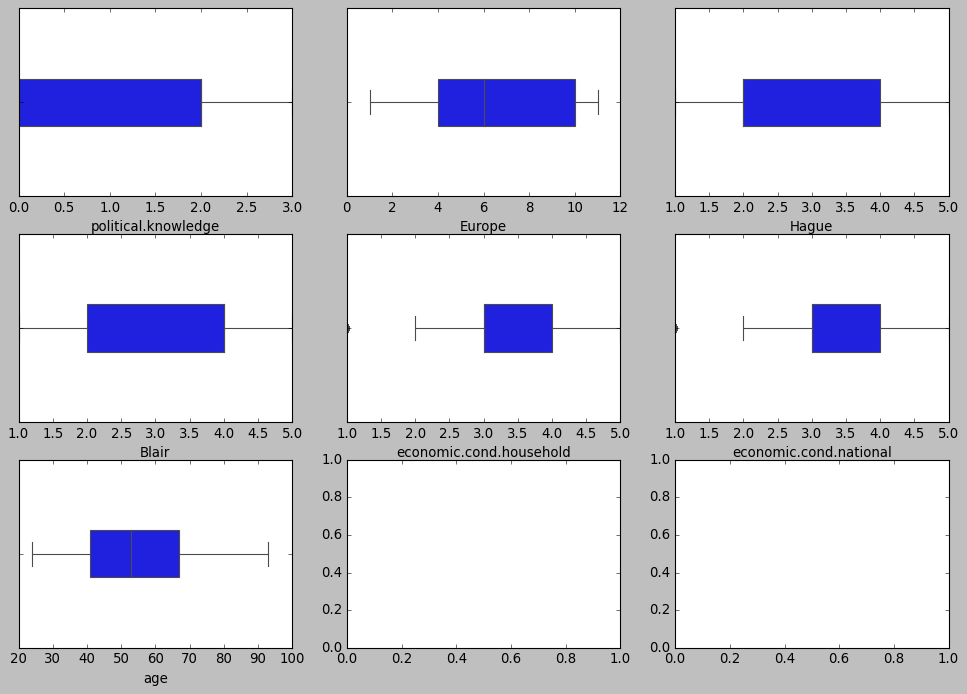

In [914]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
sns.boxplot(df['political.knowledge'],ax=axes[0,0],width=0.25)
sns.boxplot(df['Europe'],ax=axes[0,1],width=0.25)
sns.boxplot(df['Hague'],ax=axes[0,2],width=0.25)
sns.boxplot(df['Blair'],ax=axes[1,0],width=0.25)
sns.boxplot(df['economic.cond.household'],ax=axes[1,1],width=0.25)
sns.boxplot(df['economic.cond.national'],ax=axes[1,2],width=0.25)
sns.boxplot(df['age'],ax=axes[2,0],width=0.25)
plt.show()

In [915]:
(df[df['economic.cond.household']==1].count()[0]/df.count() *100)[0] ## Percentage of records that are outliers as percentage of total


4.2622950819672125

In [916]:
(df[df['economic.cond.national']==1].count()[0]/df.count() *100)[0] ## Percentage of records that are outliers as percentage of total


2.4262295081967213

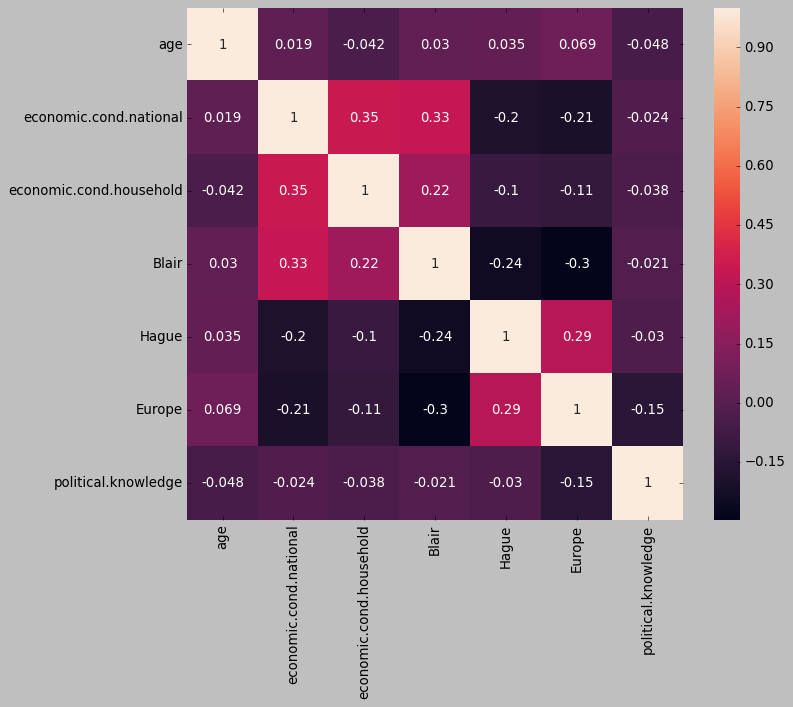

In [917]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [918]:
df.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male


In [919]:
cat=["vote","gender"]

In [920]:
for feature in cat: 
    #if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [921]:
df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1


In [922]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler()
columns=df.columns
df['age'] = X.fit_transform(df[['age']])
for i in columns:
    df[i] = X.fit_transform(df[[i]])
    

In [923]:
df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0


In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   float64
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender                   1525 non-null   float64
dtypes: float64(9)
memory usage: 107.4 KB


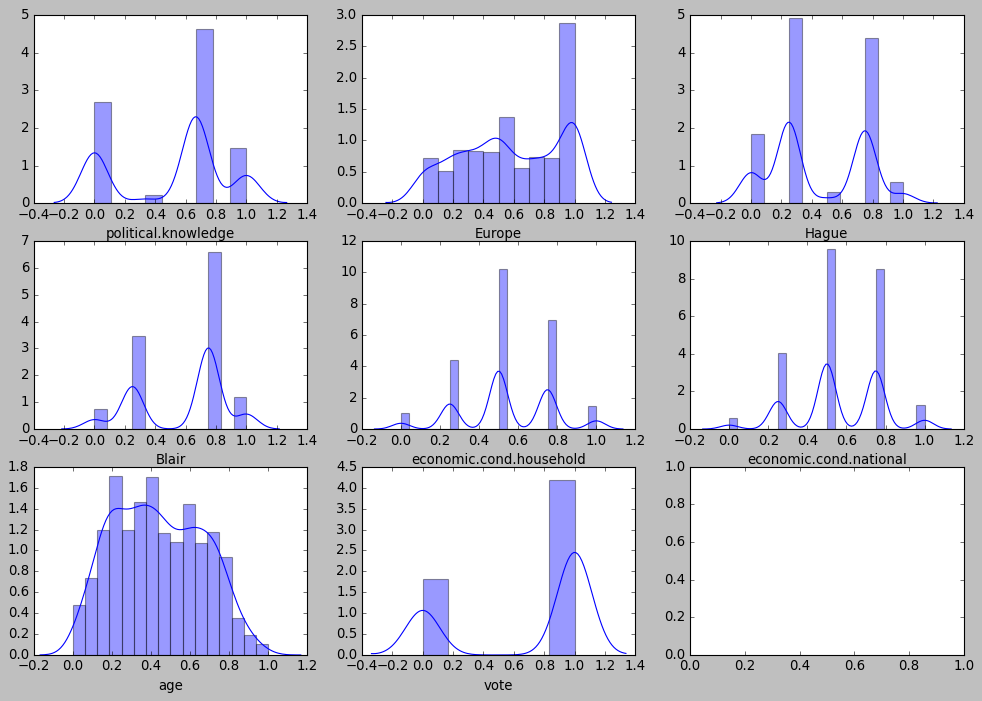

In [925]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
#sns.boxplot(vert=0)
#plt.title('With Outliers',fontsize=16)
sns.distplot(df['political.knowledge'],ax=axes[0,0])
sns.distplot(df['Europe'],ax=axes[0,1])
sns.distplot(df['Hague'],ax=axes[0,2])
sns.distplot(df['Blair'],ax=axes[1,0])
sns.distplot(df['economic.cond.household'],ax=axes[1,1])
sns.distplot(df['economic.cond.national'],ax=axes[1,2])
sns.distplot(df['age'],ax=axes[2,0])
sns.distplot(df['vote'],ax=axes[2,1])
plt.show()

In [1426]:
X=df.drop('vote', axis=1)
y=df[['vote']]

In [927]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

#### LINEAR DISCRIMINANT ANALYSIS

In [928]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [929]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)
ytest_predict_prob=lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.952522,0.047478
1,0.741265,0.258735
2,0.328720,0.671280
3,0.486416,0.513584
4,0.139250,0.860750


#### AUC and ROC for the training data

AUC: 0.889


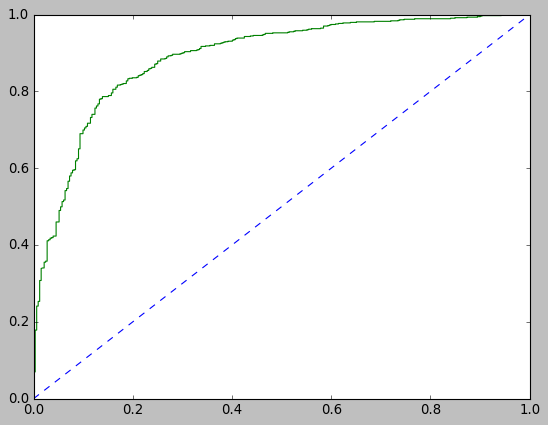

In [930]:
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr,lda_train_tpr,lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [931]:
# Accuracy - Train Data
lda_train_acc=lda.score(X_train, y_train)
lda_train_acc

0.8369259606373008

In [932]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       332
         1.0       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [933]:
confusion_matrix(y_train, ytrain_predict)

array([[233,  99],
       [ 75, 660]], dtype=int64)

In [934]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)


In [935]:
lda_df=pd.DataFrame(lda_metrics).transpose()


In [936]:
lda_df.head(5)

,precision,recall,f1-score,support
0.0,0.756494,0.701807,0.728125,332.000000
1.0,0.869565,0.897959,0.883534,735.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.813029,0.799883,0.805830,1067.000000
weighted avg,0.834383,0.836926,0.835178,1067.000000


In [937]:
lda_train_recall=round(lda_df.loc["1.0"][1],2)
lda_train_f1=round(lda_df.loc["1.0"][2],2)
lda_train_precision=round(lda_df.loc["1.0"][0],2)


In [938]:
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print('LDA TRAIN AUC: %.3f' % lda_train_auc)
print('LDA Train Accuracy :%.3f'% lda_train_acc)

lda_train_precision  0.87
lda_train_recall  0.9
lda_train_f1  0.88
LDA TRAIN AUC: 0.889
LDA Train Accuracy :0.837


#### AUC and ROC for the test data

AUC: 0.884


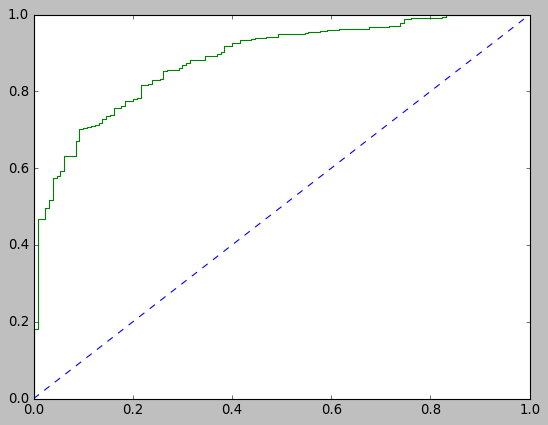

In [939]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [940]:
# Accuracy - Test Data
lda_test_acc=lda.score(X_test, y_test)
lda_test_acc

0.8187772925764192

In [941]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67       130
         1.0       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [942]:
confusion_matrix(y_test, ytest_predict)

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [943]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lda_df=pd.DataFrame(lda_metrics).transpose()
lda_test_recall=round(lda_df.loc["1.0"][1],2)
lda_test_f1=round(lda_df.loc["1.0"][2],2)
lda_test_precision=round(lda_df.loc["1.0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)
print('LDA TEST AUC: %.3f' % lda_test_auc)
print('LDA Test Accuracy :%.3f'% lda_test_acc)

lda_test_precision  0.87
lda_test_recall  0.88
lda_test_f1  0.87
LDA TEST AUC: 0.884
LDA Test Accuracy :0.819


# LOGISTIC REGRESSION

In [1156]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
# Fit the Logistic Regression logreg
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

#### Predicting labels on Train and Test data

In [1157]:
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

#### Getting the Predicted Classes and Probs

In [1158]:
ytest_predict_prob=logreg.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.932489,0.067511
1,0.687357,0.312643
2,0.335463,0.664537
3,0.476970,0.523030
4,0.161627,0.838373


#### Model Evaluation

In [1159]:
# Accuracy - Training Data
logreg.score(X_train, y_train)

0.8406747891283973

#### AUC and ROC for the training data

AUC: 0.889


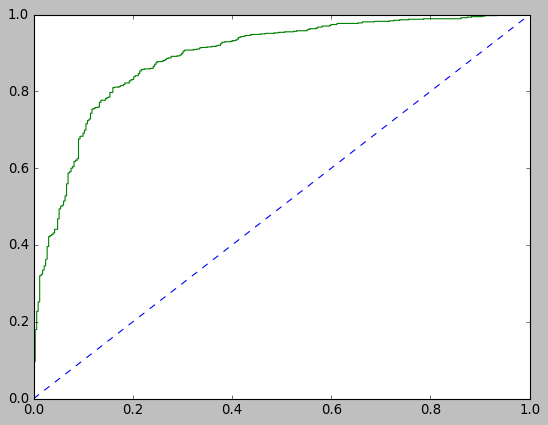

In [1160]:
# predict probabilities
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
logreg_train_fpr, logreg_train_tpr, logreg_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_fpr, logreg_train_tpr)

In [1161]:
# Accuracy - Train Data

logreg_train_acc=logreg.score(X_train, y_train) 
logreg_train_acc

0.8406747891283973

In [1162]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1163]:
logreg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()
logreg_train_recall=round(logreg_df.loc["1.0"][1],2)
logreg_train_f1=round(logreg_df.loc["1.0"][2],2)
logreg_train_precision=round(logreg_df.loc["1.0"][0],2)
print ('logreg_train_precision ',logreg_train_precision)
print ('logreg_train_recall ',logreg_train_recall)
print ('logreg_train_f1 ',logreg_train_f1)
print('AUC: %.3f' % logreg_train_auc)
print('Train Accuracy :%.3f'% logreg_train_acc)

logreg_train_precision  0.87
logreg_train_recall  0.91
logreg_train_f1  0.89
AUC: 0.889
Train Accuracy :0.841


In [1164]:
#### AUC and ROC for the test data

AUC: 0.883


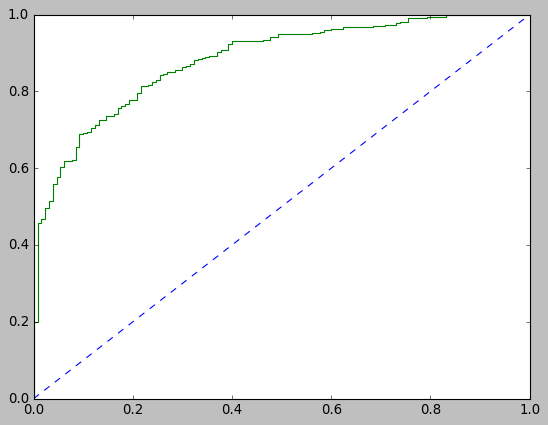

In [1165]:
# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
logreg_test_fpr, logreg_test_tpr, logreg_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_test_fpr, logreg_test_tpr)

In [1166]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 85,  45],
       [ 36, 292]], dtype=int64)

In [1167]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 85,  45],
       [ 36, 292]], dtype=int64)

In [1168]:
#Test Data Accuracy
logreg_test_acc=logreg.score(X_test,y_test)
logreg_test_acc

0.8231441048034934

In [1169]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.68       130
         1.0       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1170]:
logreg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()
logreg_test_recall=round(logreg_df.loc["1.0"][1],2)
logreg_test_f1=round(logreg_df.loc["1.0"][2],2)
logreg_test_precision=round(logreg_df.loc["1.0"][0],2)
print ('logreg_test_precision ',logreg_test_precision)
print ('logreg_test_recall ',logreg_test_recall)
print ('logreg_test_f1 ',logreg_test_f1)
print('AUC: %.3f' % logreg_test_auc)
print('Test Accuracy :%.3f'% logreg_test_acc)

logreg_test_precision  0.87
logreg_test_recall  0.89
logreg_test_f1  0.88
AUC: 0.883
Test Accuracy :0.823


In [1171]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Reg Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'Logistic Reg Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic Reg Train,Logistic Reg Test,LDA Train,LDA Test
Accuracy,0.84,0.82,0.84,0.82
AUC,0.89,0.88,0.89,0.88
Recall,0.91,0.89,0.90,0.88
Precision,0.87,0.87,0.87,0.87
F1 Score,0.89,0.88,0.88,0.87


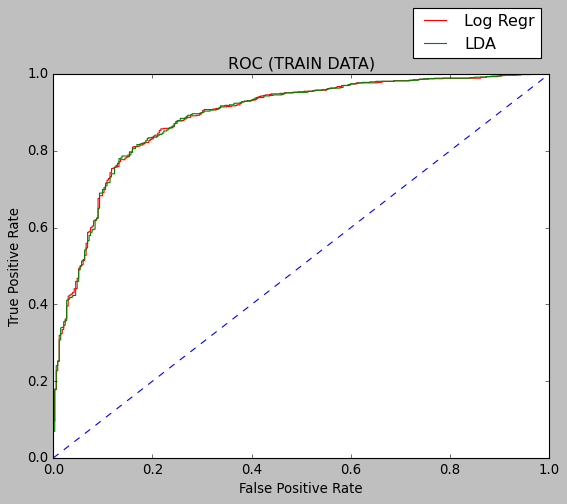

In [1427]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logreg_train_fpr, logreg_train_tpr,color='red',label="Log Regr")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (TRAIN DATA)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

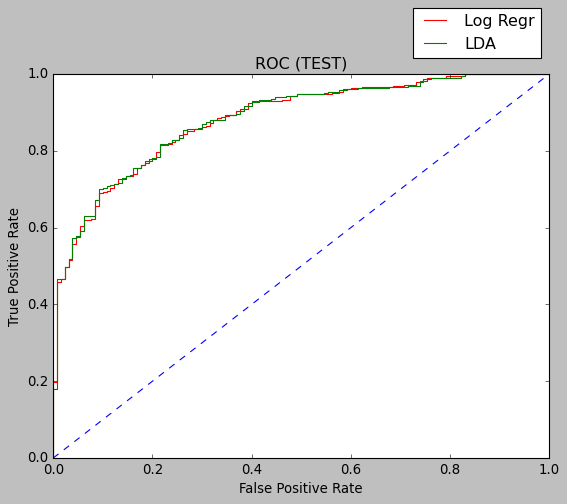

In [1428]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logreg_test_fpr, logreg_test_tpr,color='red',label="Log Regr")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (TEST)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# K Nearest Neighbors (KNN)

In [1174]:
from sklearn.neighbors import KNeighborsClassifier

In [1175]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1176]:
clfKNN=KNeighborsClassifier()

In [1177]:
clfKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [1178]:
ytrain_predict = clfKNN.predict(X_train)
ytest_predict = clfKNN.predict(X_test)

ytest_predict_prob=clfKNN.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.8,0.2
1,0.8,0.2
2,0.2,0.8
3,0.4,0.6
4,0.0,1.0


AUC: 0.935
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       332
         1.0       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067

clfKNN_train_precision  0.89
clfKNN_train_recall  0.91
clfKNN_train_f1  0.9
AUC: 0.935
Train Accuracy :0.866


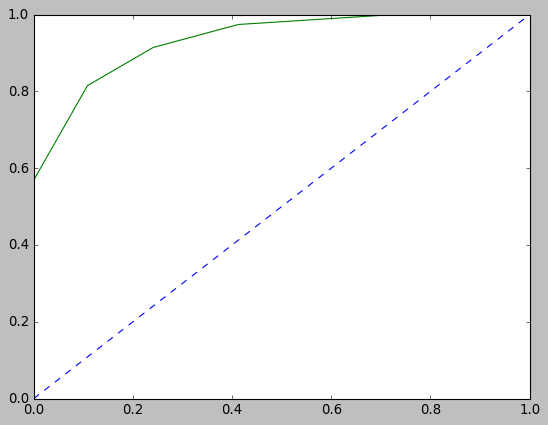

In [1179]:
# Accuracy - Training Data
clfKNN.score(X_train, y_train)

# predict probabilities
probs = clfKNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfKNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % clfKNN_train_auc)
# calculate roc curve
clfKNN_train_fpr, clfKNN_train_tpr, clfKNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfKNN_train_fpr, clfKNN_train_tpr)

clfKNN_train_acc=clfKNN.score(X_train, y_train) 
clfKNN_train_acc

print(classification_report(y_train, ytrain_predict))

clfKNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
clfKNN_df=pd.DataFrame(clfKNN_metrics).transpose()
clfKNN_train_recall=round(clfKNN_df.loc["1.0"][1],2)
clfKNN_train_f1=round(clfKNN_df.loc["1.0"][2],2)
clfKNN_train_precision=round(clfKNN_df.loc["1.0"][0],2)
print ('clfKNN_train_precision ',clfKNN_train_precision)
print ('clfKNN_train_recall ',clfKNN_train_recall)
print ('clfKNN_train_f1 ',clfKNN_train_f1)
print('AUC: %.3f' % clfKNN_train_auc)
print('Train Accuracy :%.3f'% clfKNN_train_acc)











AUC: 0.865


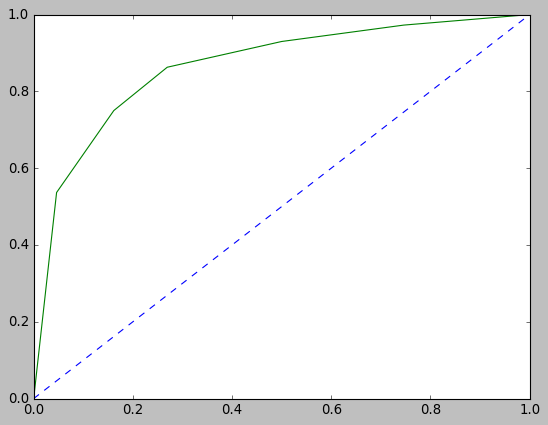

In [1180]:
# predict probabilities
probs = clfKNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfKNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % clfKNN_test_auc)
# calculate roc curve
clfKNN_test_fpr, clfKNN_test_tpr, clfKNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfKNN_test_fpr, clfKNN_test_tpr)

In [1181]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 95,  35],
       [ 45, 283]], dtype=int64)

In [1182]:

#Test Data Accuracy
clfKNN_test_acc=clfKNN.score(X_test,y_test)
clfKNN_test_acc

0.8253275109170306

In [1183]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       130
         1.0       0.89      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



In [1184]:
clfKNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)

In [1185]:
clfKNN_df=pd.DataFrame(clfKNN_metrics).transpose()
clfKNN_test_recall=round(clfKNN_df.loc["1.0"][1],2)
clfKNN_test_f1=round(clfKNN_df.loc["1.0"][2],2)
clfKNN_test_precision=round(clfKNN_df.loc["1.0"][0],2)
print ('clfKNN_test_precision ',clfKNN_test_precision)
print ('clfKNN_test_recall ',clfKNN_test_recall)
print ('clfKNN_test_f1 ',clfKNN_test_f1)
print('AUC: %.3f' % clfKNN_test_auc)
print('Test Accuracy :%.3f'% clfKNN_test_acc)

clfKNN_test_precision  0.89
clfKNN_test_recall  0.86
clfKNN_test_f1  0.88
AUC: 0.865
Test Accuracy :0.825


# SVM - Support Vector Machine


In [1186]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1187]:
from sklearn import svm
clfSVM = svm.SVC(probability=True)
clfSVM.fit(X_train, y_train)

ytrain_predict = clfSVM.predict(X_train)
ytest_predict = clfSVM.predict(X_test)



In [1188]:
ytest_predict_prob=clfSVM.predict_proba(X_test)

pd.DataFrame(ytest_predict_prob).head()



,0,1
0,0.820005,0.179995
1,0.876651,0.123349
2,0.167289,0.832711
3,0.457727,0.542273
4,0.139655,0.860345


In [1189]:

# Accuracy - Training Data
clfSVM.score(X_train, y_train)

0.8603561387066542

In [1448]:
confusion_matrix(y_train, ytrain_predict)

array([[262,  70],
       [ 51, 684]], dtype=int64)

In [1190]:

# predict probabilities
probs = clfSVM.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

AUC: 0.914


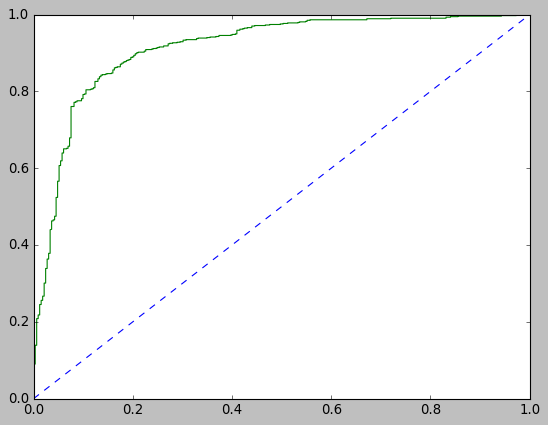

In [1191]:
# calculate AUC
clfSVM_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % clfSVM_train_auc)
# calculate roc curve
clfSVM_train_fpr, clfSVM_train_tpr, clfSVM_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfSVM_train_fpr, clfSVM_train_tpr)

In [1192]:
clfSVM_train_acc=clfSVM.score(X_train, y_train) 
clfSVM_train_acc

0.8603561387066542

In [1193]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       332
         1.0       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [1194]:
clfSVM_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
clfSVM_df=pd.DataFrame(clfSVM_metrics).transpose()
clfSVM_train_recall=round(clfSVM_df.loc["1.0"][1],2)
clfSVM_train_f1=round(clfSVM_df.loc["1.0"][2],2)
clfSVM_train_precision=round(clfSVM_df.loc["1.0"][0],2)
print ('clfSVM_train_precision ',clfSVM_train_precision)
print ('clfSVM_train_recall ',clfSVM_train_recall)
print ('clfSVM_train_f1 ',clfSVM_train_f1)
print('AUC: %.3f' % clfSVM_train_auc)
print('Train Accuracy :%.3f'% clfSVM_train_acc)

clfSVM_train_precision  0.88
clfSVM_train_recall  0.93
clfSVM_train_f1  0.9
AUC: 0.914
Train Accuracy :0.860


In [1195]:
# predict probabilities
probs = clfSVM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfSVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % clfSVM_test_auc)

AUC: 0.898


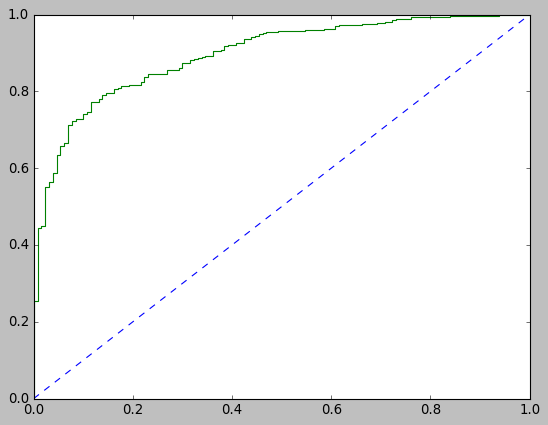

In [1196]:
# calculate roc curve
clfSVM_test_fpr, clfSVM_test_tpr, clfSVM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfSVM_test_fpr, clfSVM_test_tpr)

In [1197]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 83,  47],
       [ 34, 294]], dtype=int64)

In [1198]:
#Test Data Accuracy
clfSVM_test_acc=clfSVM.score(X_test,y_test)
clfSVM_test_acc

0.8231441048034934

In [1199]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       130
         1.0       0.86      0.90      0.88       328

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1200]:
clfSVM_metrics=classification_report(y_test, ytest_predict,output_dict=True)
clfSVM_df=pd.DataFrame(clfSVM_metrics).transpose()
clfSVM_test_recall=round(clfSVM_df.loc["1.0"][1],2)
clfSVM_test_f1=round(clfSVM_df.loc["1.0"][2],2)
clfSVM_test_precision=round(clfSVM_df.loc["1.0"][0],2)
print ('clfSVM_test_precision ',clfSVM_test_precision)
print ('clfSVM_test_recall ',clfSVM_test_recall)
print ('clfSVM_test_f1 ',clfSVM_test_f1)
print('AUC: %.3f' % clfSVM_test_auc)
print('Test Accuracy :%.3f'% clfSVM_test_acc)

clfSVM_test_precision  0.86
clfSVM_test_recall  0.9
clfSVM_test_f1  0.88
AUC: 0.898
Test Accuracy :0.823


# Naive Bayes

In [1202]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1203]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1204]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)

ytrain_predict = gaussNB.predict(X_train)
ytest_predict = gaussNB.predict(X_test)

ytest_predict_prob=gaussNB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy - Training Data
gaussNB.score(X_train, y_train)

# predict probabilities
probs = gaussNB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gaussNB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gaussNB_train_auc)

AUC: 0.886


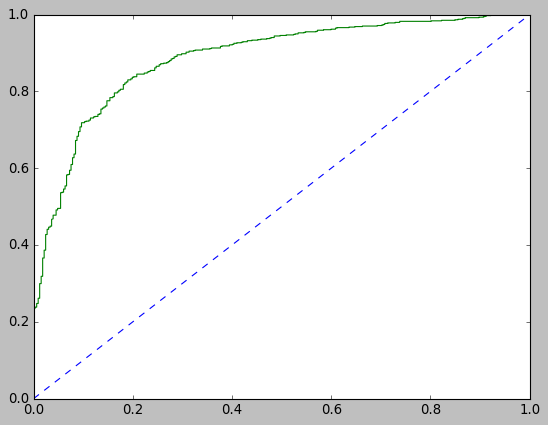

In [1205]:
# calculate roc curve
gaussNB_train_fpr, gaussNB_train_tpr, gaussNB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gaussNB_train_fpr, gaussNB_train_tpr)

In [1206]:
gaussNB_train_acc=gaussNB.score(X_train, y_train) 
gaussNB_train_acc

0.8331771321462043

In [1207]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73       332
         1.0       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [1208]:
gaussNB_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
gaussNB_df=pd.DataFrame(gaussNB_metrics).transpose()
gaussNB_train_recall=round(gaussNB_df.loc["1.0"][1],2)
gaussNB_train_f1=round(gaussNB_df.loc["1.0"][2],2)
gaussNB_train_precision=round(gaussNB_df.loc["1.0"][0],2)
print ('gaussNB_train_precision ',gaussNB_train_precision)
print ('gaussNB_train_recall ',gaussNB_train_recall)
print ('gaussNB_train_f1 ',gaussNB_train_f1)
print('AUC: %.3f' % gaussNB_train_auc)
print('Train Accuracy :%.3f'% gaussNB_train_acc)

gaussNB_train_precision  0.88
gaussNB_train_recall  0.88
gaussNB_train_f1  0.88
AUC: 0.886
Train Accuracy :0.833


In [1209]:
# predict probabilities
probs = gaussNB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gaussNB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gaussNB_test_auc)

AUC: 0.885


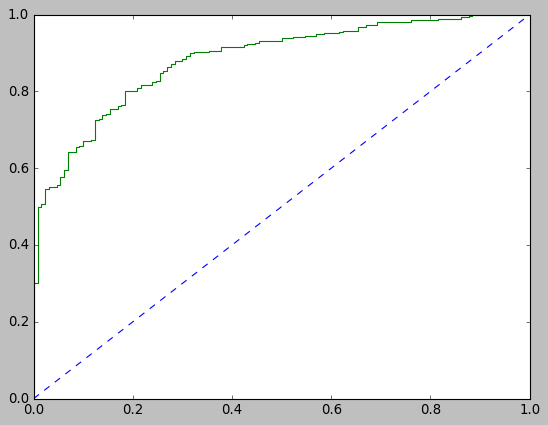

In [1210]:
# calculate roc curve
gaussNB_test_fpr, gaussNB_test_tpr, gaussNB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gaussNB_test_fpr, gaussNB_test_tpr)

In [1211]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix


array([[ 94,  36],
       [ 44, 284]], dtype=int64)

In [1212]:
#Test Data Accuracy
gaussNB_test_acc=gaussNB.score(X_test,y_test)
gaussNB_test_acc

0.8253275109170306

In [1213]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       130
         1.0       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [1214]:
gaussNB_metrics=classification_report(y_test, ytest_predict,output_dict=True)
gaussNB_df=pd.DataFrame(gaussNB_metrics).transpose()
gaussNB_test_recall=round(gaussNB_df.loc["1.0"][1],2)
gaussNB_test_f1=round(gaussNB_df.loc["1.0"][2],2)
gaussNB_test_precision=round(gaussNB_df.loc["1.0"][0],2)
print ('gaussNB_test_precision ',gaussNB_test_precision)
print ('gaussNB_test_recall ',gaussNB_test_recall)
print ('gaussNB_test_f1 ',gaussNB_test_f1)
print('AUC: %.3f' % gaussNB_test_auc)
print('Test Accuracy :%.3f'% gaussNB_test_acc)

gaussNB_test_precision  0.89
gaussNB_test_recall  0.87
gaussNB_test_f1  0.88
AUC: 0.885
Test Accuracy :0.825


In [1215]:
# MODEL TUNING

In [1216]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1218]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
clfCVRF = RandomForestClassifier(n_estimators=100)


In [1219]:
for i in [2,3,4,5,10,15]:
  print(i)
  scores = cross_val_score(clfCVRF,X_train, y_train, cv=i) 
  print(np.mean(scores))
  scores = cross_val_score(clfCVRF,X_test, y_test, cv=i) 
  print(np.mean(scores))

2
0.8153656428526256
0.8231441048034935
3
0.8163237854090838
0.8122348354546497
4
0.8200557573709555
0.8297101449275363
5
0.8228906147163354
0.8254658385093168
10
0.8219978839710809
0.8361835748792272
15
0.8295252999478353
0.8520430107526883


In [1235]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9,20,30],
    'max_features': [8],
    'min_samples_leaf': [15,30,45],
    'min_samples_split': [25,50,75],
    'n_estimators': [15,25,50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [1236]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 20, 30], 'max_features': [8],
                         'min_samples_leaf': [15, 30, 45],
                         'min_samples_split': [25, 50, 75],
                         'n_estimators': [15, 25, 50]})

In [1237]:
param_grid=grid_search.best_params_

In [1238]:
param_grid

{'max_depth': 20,
 'max_features': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 15}

In [1239]:
param_grid={'max_depth': [20],
 'max_features': [8],
 'min_samples_leaf': [15],
 'min_samples_split': [50],
 'n_estimators': [15]}

In [1240]:
clfCVRF = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)


In [1241]:
clfCVRF.fit(X_train, y_train)

ytrain_predict = clfCVRF.predict(X_train)
ytest_predict = clfCVRF.predict(X_test)

ytest_predict_prob=clfCVRF.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy - Training Data
cross_val_score(clfCVRF,X_test, y_test, cv=5)

# predict probabilities
probs = clfCVRF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfCVRF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % clfCVRF_train_auc)

AUC: 0.911


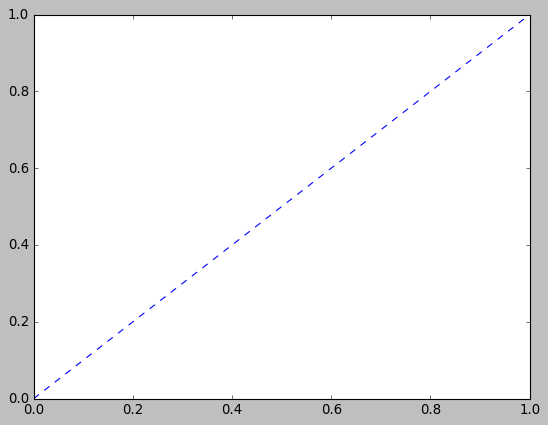

In [1242]:
# calculate roc curve
clfCVRF_train_fpr, clfCVRF_train_tpr, clfCVRF_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')




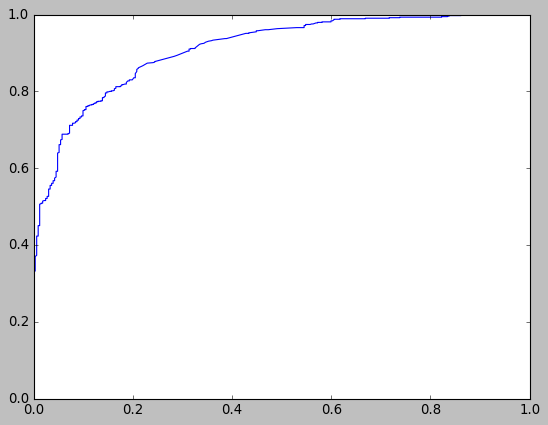

In [1243]:
# plot the roc curve for the model
plt.plot(clfCVRF_train_fpr, clfCVRF_train_tpr)

In [1244]:
clfCVRF_train_acc=clfCVRF.score(X_train, y_train) 
clfCVRF_train_acc



0.8388003748828491

In [1245]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       332
         1.0       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1248]:
clfCVRF_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
clfCVRF_df=pd.DataFrame(clfCVRF_metrics).transpose()
clfCVRF_train_recall=round(clfCVRF_df.loc["1.0"][1],2)
clfCVRF_train_f1=round(clfCVRF_df.loc["1.0"][2],2)
clfCVRF_train_precision=round(clfCVRF_df.loc["1.0"][0],2)
print ('clfCVRF_train_precision ',clfCVRF_train_precision)
print ('clfCVRF_train_recall ',clfCVRF_train_recall)
print ('clfCVRF_train_f1 ',clfCVRF_train_f1)
print('AUC: %.3f' % clfCVRF_train_auc)
print('Train Accuracy :%.3f'% clfCVRF_train_acc)

clfCVRF_train_precision  0.87
clfCVRF_train_recall  0.91
clfCVRF_train_f1  0.89
AUC: 0.911
Train Accuracy :0.839


In [1249]:
# predict probabilities
probs = clfCVRF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfCVRF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % clfCVRF_test_auc)

AUC: 0.883


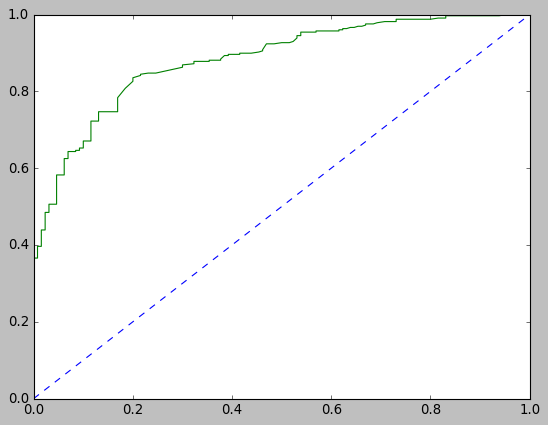

In [1250]:
# calculate roc curve
clfCVRF_test_fpr, clfCVRF_test_tpr, clfCVRF_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfCVRF_test_fpr, clfCVRF_test_tpr)

In [1251]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 86,  44],
       [ 40, 288]], dtype=int64)

In [1252]:
#Test Data Accuracy
clfCVRF_test_acc=clfCVRF.score(X_test,y_test)
clfCVRF_test_acc

0.8165938864628821

In [1253]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       130
         1.0       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



In [1254]:
clfCVRF_metrics=classification_report(y_test, ytest_predict,output_dict=True)
clfCVRF_df=pd.DataFrame(clfCVRF_metrics).transpose()
clfCVRF_test_recall=round(clfCVRF_df.loc["1.0"][1],2)
clfCVRF_test_f1=round(clfCVRF_df.loc["1.0"][2],2)
clfCVRF_test_precision=round(clfCVRF_df.loc["1.0"][0],2)
print ('clfCVRF_test_precision ',clfCVRF_test_precision)
print ('clfCVRF_test_recall ',clfCVRF_test_recall)
print ('clfCVRF_test_f1 ',clfCVRF_test_f1)
print('AUC: %.3f' % clfCVRF_test_auc)
print('Test Accuracy :%.3f'% clfCVRF_test_acc)

clfCVRF_test_precision  0.87
clfCVRF_test_recall  0.88
clfCVRF_test_f1  0.87
AUC: 0.883
Test Accuracy :0.817


# BAGGING 

In [1386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1387]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification


In [1388]:
X_train, y_train=make_classification(n_samples=500, n_features=8, n_informative=2, n_redundant=0,random_state=1, shuffle=False)

In [1389]:
rfclf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=1).fit(X_train, y_train)

In [1390]:
ytrain_predict = rfclf.predict(X_train)
ytest_predict = rfclf.predict(X_test)

ytest_predict_prob=rfclf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy - Training Data
rfclf.score(X_train, y_train)

# predict probabilities
probs = rfclf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfclf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rfclf_train_auc)

AUC: 1.000


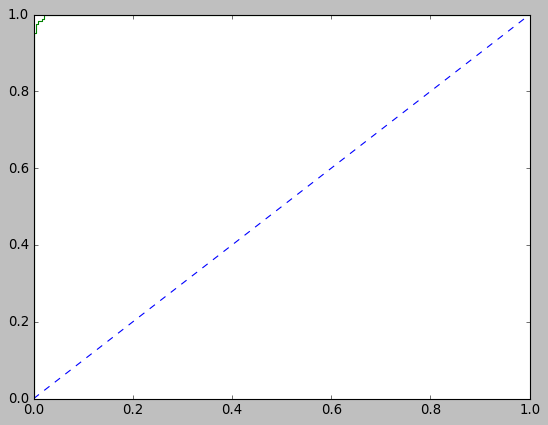

In [1391]:
# calculate roc curve
rfclf_train_fpr, rfclf_train_tpr, rfclf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfclf_train_fpr, rfclf_train_tpr)



In [1392]:
rfclf_train_acc=rfclf.score(X_train, y_train) 
rfclf_train_acc


0.986

In [1393]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       252
           1       0.99      0.98      0.99       248

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [1394]:
rfclf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
rfclf_df=pd.DataFrame(rfclf_metrics).transpose()
rfclf_train_recall=round(rfclf_df.loc["1"][1],2)
rfclf_train_f1=round(rfclf_df.loc["1"][2],2)
rfclf_train_precision=round(rfclf_df.loc["1"][0],2)
print ('rfclf_train_precision ',rfclf_train_precision)
print ('rfclf_train_recall ',rfclf_train_recall)
print ('rfclf_train_f1 ',rfclf_train_f1)
print('AUC: %.3f' % rfclf_train_auc)
print('Train Accuracy :%.3f'% rfclf_train_acc)

rfclf_train_precision  0.99
rfclf_train_recall  0.98
rfclf_train_f1  0.99
AUC: 1.000
Train Accuracy :0.986


AUC: 0.723


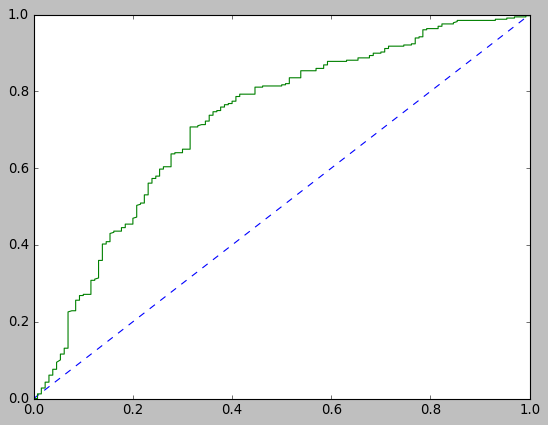

In [1395]:
# predict probabilities
probs = rfclf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfclf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rfclf_test_auc)
# calculate roc curve
rfclf_test_fpr, rfclf_test_tpr, rfclf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfclf_test_fpr, rfclf_test_tpr)

In [1396]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[  6, 124],
       [  4, 324]], dtype=int64)

In [1397]:
#Test Data Accuracy
rfclf_test_acc=rfclf.score(X_test,y_test)
rfclf_test_acc

print(classification_report(y_test, ytest_predict))


              precision    recall  f1-score   support

         0.0       0.60      0.05      0.09       130
         1.0       0.72      0.99      0.84       328

    accuracy                           0.72       458
   macro avg       0.66      0.52      0.46       458
weighted avg       0.69      0.72      0.62       458



In [1398]:
rfclf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
rfclf_df=pd.DataFrame(rfclf_metrics).transpose()
rfclf_test_recall=round(rfclf_df.loc["1.0"][1],2)
rfclf_test_f1=round(rfclf_df.loc["1.0"][2],2)
rfclf_test_precision=round(rfclf_df.loc["1.0"][0],2)
print ('rfclf_test_precision ',rfclf_test_precision)
print ('rfclf_test_recall ',rfclf_test_recall)
print ('rfclf_test_f1 ',rfclf_test_f1)
print('AUC: %.3f' % rfclf_test_auc)
print('Test Accuracy :%.3f'% rfclf_test_acc)

rfclf_test_precision  0.72
rfclf_test_recall  0.99
rfclf_test_f1  0.84
AUC: 0.723
Test Accuracy :0.721


## BOOSTING (ADABOOST)

In [1399]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [1400]:
from sklearn.ensemble import AdaBoostClassifier
clfXGB = AdaBoostClassifier(n_estimators=200)
clfXGB.fit(X_train, y_train)

ytrain_predict = clfXGB.predict(X_train)
ytest_predict = clfXGB.predict(X_test)

ytest_predict_prob=clfXGB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy - Training Data
clfXGB.score(X_train, y_train)

# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfXGB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % clfXGB_train_auc)

AUC: 0.916


In [1401]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1453,0.550725,0.50,0.50,0.25,0.25,1.0,0.666667,0.0
275,0.362319,0.50,0.50,0.25,0.25,0.7,0.000000,0.0
1130,0.724638,0.75,0.75,0.75,0.75,0.6,0.000000,1.0
1153,0.478261,0.25,0.50,0.75,0.25,0.5,0.666667,0.0
1172,0.000000,0.75,1.00,0.75,0.75,0.5,0.000000,1.0
...,...,...,...,...,...,...,...,...
715,0.623188,0.75,0.50,1.00,0.25,0.1,0.666667,1.0
905,0.043478,1.00,1.00,0.25,0.00,0.3,1.000000,1.0
1096,0.144928,0.75,1.00,0.75,0.75,0.6,0.666667,0.0
235,0.173913,0.75,0.75,0.75,0.25,0.6,0.666667,0.0


In [1402]:
#from sklearn.ensemble import xgboost
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1403]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
91,0.362319,0.00,0.00,0.25,0.75,0.7,1.000000,0.0
1194,0.144928,0.50,0.50,0.25,0.75,0.8,0.666667,1.0
201,0.391304,0.25,0.25,0.75,0.75,0.3,0.666667,1.0
613,0.086957,0.25,0.50,0.75,0.75,0.6,1.000000,1.0
283,0.260870,0.50,0.50,0.25,0.25,0.8,0.000000,1.0
...,...,...,...,...,...,...,...,...
1196,0.318841,0.50,0.75,1.00,0.25,0.2,0.666667,0.0
205,0.304348,0.75,0.75,0.75,0.25,1.0,1.000000,1.0
1330,0.434783,0.50,0.25,0.25,1.00,0.8,1.000000,1.0
997,0.333333,0.75,0.75,0.75,0.00,0.3,1.000000,1.0


In [1404]:
ytrain_predict = clfXGB.predict(X_train)
ytest_predict = clfXGB.predict(X_test)

ytest_predict_prob=clfXGB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

# Accuracy - Training Data
clfXGB.score(X_train, y_train)

# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfXGB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % clfXGB_train_auc)

AUC: 0.941


              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       332
         1.0       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



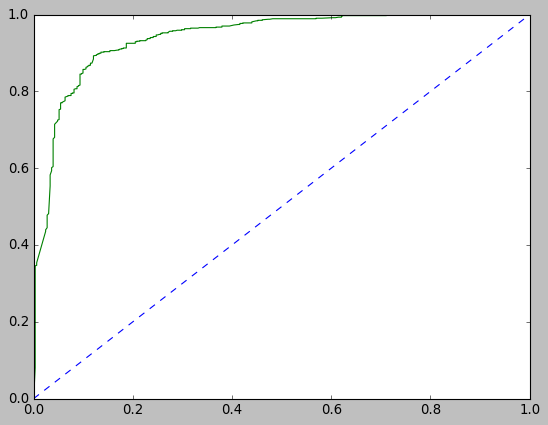

In [1405]:
# calculate roc curve
clfXGB_train_fpr, clfXGB_train_tpr, clfXGB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfXGB_train_fpr, clfXGB_train_tpr)

clfXGB_train_acc=clfXGB.score(X_train, y_train) 
clfXGB_train_acc

print(classification_report(y_train, ytrain_predict))

In [1406]:
clfXGB_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
clfXGB_df=pd.DataFrame(clfXGB_metrics).transpose()
clfXGB_train_recall=round(clfXGB_df.loc["1.0"][1],2)
clfXGB_train_f1=round(clfXGB_df.loc["1.0"][2],2)
clfXGB_train_precision=round(clfXGB_df.loc["1.0"][0],2)
print ('clfXGB_train_precision ',clfXGB_train_precision)
print ('clfXGB_train_recall ',clfXGB_train_recall)
print ('clfXGB_train_f1 ',clfXGB_train_f1)
print('AUC: %.3f' % clfXGB_train_auc)
print('Train Accuracy :%.3f'% clfXGB_train_acc)

clfXGB_train_precision  0.91
clfXGB_train_recall  0.93
clfXGB_train_f1  0.92
AUC: 0.941
Train Accuracy :0.887


In [1407]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
clfXGB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % clfXGB_test_auc)

AUC: 0.878


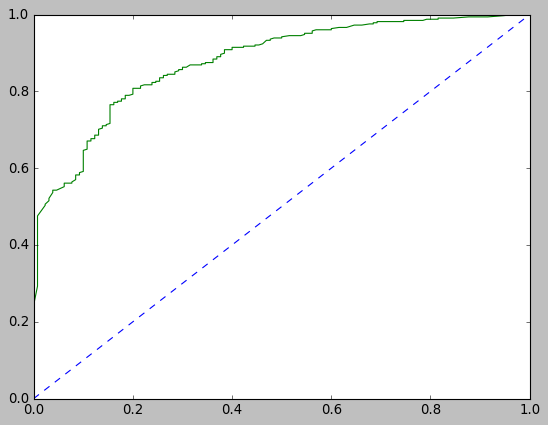

In [1408]:
# calculate roc curve
clfXGB_test_fpr, clfXGB_test_tpr, clfXGB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clfXGB_test_fpr, clfXGB_test_tpr)

In [1409]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix



array([[ 93,  37],
       [ 49, 279]], dtype=int64)

In [1410]:
#Test Data Accuracy
clfXGB_test_acc=clfXGB.score(X_test,y_test)
clfXGB_test_acc

print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.72      0.68       130
         1.0       0.88      0.85      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.81       458



In [1411]:
clfXGB_metrics=classification_report(y_test, ytest_predict,output_dict=True)
clfXGB_df=pd.DataFrame(clfXGB_metrics).transpose()
clfXGB_test_recall=round(clfXGB_df.loc["1.0"][1],2)
clfXGB_test_f1=round(clfXGB_df.loc["1.0"][2],2)
clfXGB_test_precision=round(clfXGB_df.loc["1.0"][0],2)
print ('clfXGB_test_precision ',clfXGB_test_precision)
print ('clfXGB_test_recall ',clfXGB_test_recall)
print ('clfXGB_test_f1 ',clfXGB_test_f1)
print('AUC: %.3f' % clfXGB_test_auc)
print('Test Accuracy :%.3f'% clfXGB_test_acc)

clfXGB_test_precision  0.88
clfXGB_test_recall  0.85
clfXGB_test_f1  0.87
AUC: 0.878
Test Accuracy :0.812


In [1447]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logit Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'Logit Reg Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
		'KNN Train':[clfKNN_train_acc,clfKNN_train_auc,clfKNN_train_recall,clfKNN_train_precision,clfKNN_train_f1],
        'KNN Test':[clfKNN_test_acc,clfKNN_test_auc,clfKNN_test_recall,clfKNN_test_precision,clfKNN_test_f1],
       'SVM Train':[clfSVM_train_acc,clfSVM_train_auc,clfSVM_train_recall,clfSVM_train_precision,clfSVM_train_f1],
        'SVM Test':[clfSVM_test_acc,clfSVM_test_auc,clfSVM_test_recall,clfSVM_test_precision,clfSVM_test_f1],
        'NB Train':[gaussNB_train_acc,gaussNB_train_auc,gaussNB_train_recall,gaussNB_train_precision,gaussNB_train_f1],
        'NB Test':[gaussNB_test_acc,gaussNB_test_auc,gaussNB_test_recall,gaussNB_test_precision,gaussNB_test_f1],
        'Tuning(RF) Train':[clfCVRF_train_acc,clfCVRF_train_auc,clfCVRF_train_recall,clfCVRF_train_precision,clfCVRF_train_f1],
        'Tuning(RF) Test':[clfCVRF_test_acc,clfCVRF_test_auc,clfCVRF_test_recall,clfCVRF_test_precision,clfCVRF_test_f1],
       'Bagging(RF) Train':[rfclf_train_acc,rfclf_train_auc,rfclf_train_recall,rfclf_train_precision,rfclf_train_f1],
        'Bagging(RF) Test':[rfclf_test_acc,rfclf_test_auc,rfclf_test_recall,rfclf_test_precision,rfclf_test_f1], 
        'XGBoost Train':[clfXGB_train_acc,clfXGB_train_auc,clfXGB_train_recall,clfXGB_train_precision,clfXGB_train_f1],
        'XGBoost Test':[clfXGB_test_acc,clfXGB_test_auc,clfXGB_test_recall,clfXGB_test_precision,clfXGB_test_f1]
                    },index=index)
round(data,2)

,Logit Train,Logit Reg Test,LDA Train,LDA Test,KNN Train,KNN Test,SVM Train,SVM Test,NB Train,NB Test,Tuning(RF) Train,Tuning(RF) Test,Bagging(RF) Train,Bagging(RF) Test,XGBoost Train,XGBoost Test
Accuracy,0.84,0.82,0.84,0.82,0.87,0.83,0.86,0.82,0.83,0.83,0.84,0.82,0.99,0.72,0.89,0.81
AUC,0.89,0.88,0.89,0.88,0.94,0.86,0.91,0.90,0.89,0.88,0.91,0.88,1.00,0.72,0.94,0.88
Recall,0.91,0.89,0.90,0.88,0.91,0.86,0.93,0.90,0.88,0.87,0.91,0.88,0.98,0.99,0.93,0.85
Precision,0.87,0.87,0.87,0.87,0.89,0.89,0.88,0.86,0.88,0.89,0.87,0.87,0.99,0.72,0.91,0.88
F1 Score,0.89,0.88,0.88,0.87,0.90,0.88,0.90,0.88,0.88,0.88,0.89,0.87,0.99,0.84,0.92,0.87


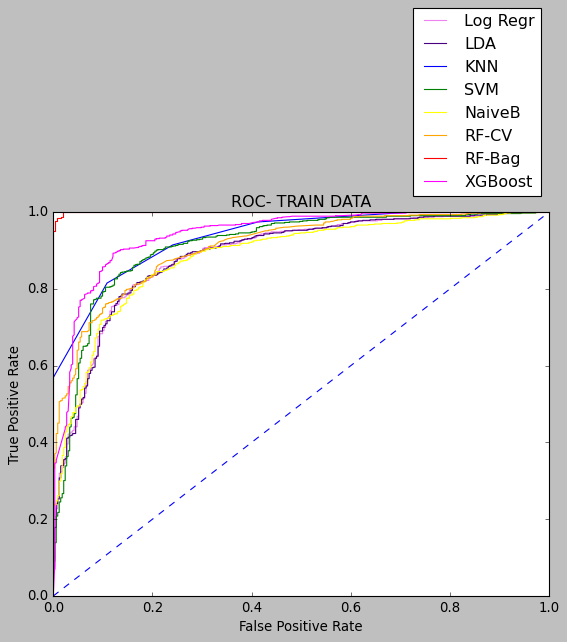

In [1445]:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logreg_train_fpr, logreg_train_tpr,color='Violet',label="Log Regr")
plt.plot(lda_train_fpr,lda_train_tpr,color='Indigo',label="LDA")
plt.plot(clfKNN_train_fpr,clfKNN_train_tpr,color='Blue',label="KNN")
plt.plot(clfSVM_train_fpr,clfSVM_train_tpr,color='Green',label="SVM")
plt.plot(gaussNB_train_fpr,gaussNB_train_tpr,color='yellow',label="NaiveB")
plt.plot(clfCVRF_train_fpr,clfCVRF_train_tpr,color='orange',label="RF-CV")
plt.plot(rfclf_train_fpr,rfclf_train_tpr,color='red',label="RF-Bag")
plt.plot(clfXGB_train_fpr,clfXGB_train_tpr,color='magenta',label="XGBoost")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- TRAIN DATA')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

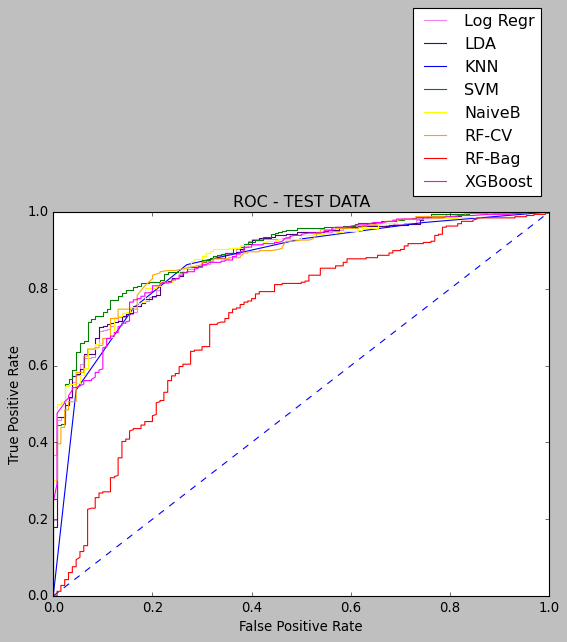

In [1446]:
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logreg_test_fpr, logreg_test_tpr,color='Violet',label="Log Regr")
plt.plot(lda_test_fpr,lda_test_tpr,color='Indigo',label="LDA")
plt.plot(clfKNN_test_fpr,clfKNN_test_tpr,color='Blue',label="KNN")
plt.plot(clfSVM_test_fpr,clfSVM_test_tpr,color='Green',label="SVM")
plt.plot(gaussNB_test_fpr,gaussNB_test_tpr,color='yellow',label="NaiveB")
plt.plot(clfCVRF_test_fpr,clfCVRF_test_tpr,color='orange',label="RF-CV")
plt.plot(rfclf_test_fpr,rfclf_test_tpr,color='red',label="RF-Bag")
plt.plot(clfXGB_test_fpr,clfXGB_test_tpr,color='magenta',label="XGBoost")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - TEST DATA')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

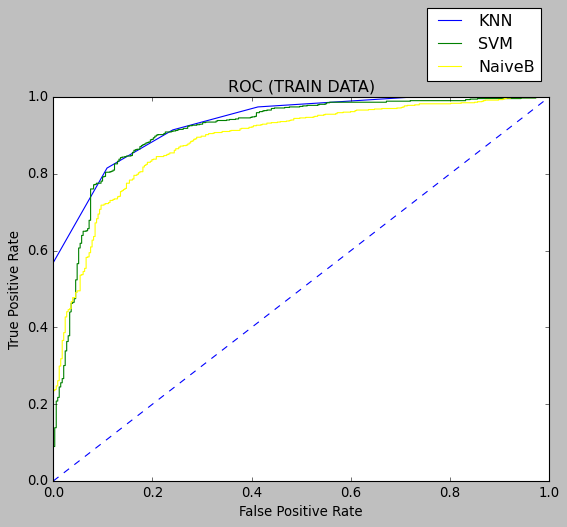

In [1436]:
plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(clfKNN_train_fpr,clfKNN_train_tpr,color='Blue',label="KNN")
plt.plot(clfSVM_train_fpr,clfSVM_train_tpr,color='Green',label="SVM")
plt.plot(gaussNB_train_fpr,gaussNB_train_tpr,color='yellow',label="NaiveB")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (TRAIN DATA)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

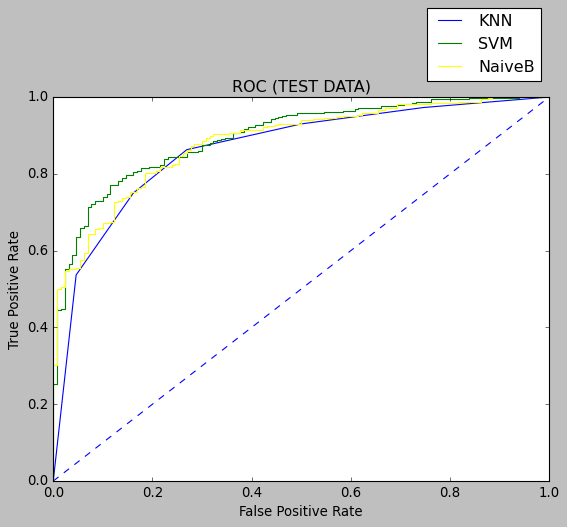

In [1435]:
plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(clfKNN_test_fpr,clfKNN_test_tpr,color='Blue',label="KNN")
plt.plot(clfSVM_test_fpr,clfSVM_test_tpr,color='Green',label="SVM")
plt.plot(gaussNB_test_fpr,gaussNB_test_tpr,color='yellow',label="NaiveB")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (TEST DATA)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [1437]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
		'KNN Train':[clfKNN_train_acc,clfKNN_train_auc,clfKNN_train_recall,clfKNN_train_precision,clfKNN_train_f1],
        'KNN Test':[clfKNN_test_acc,clfKNN_test_auc,clfKNN_test_recall,clfKNN_test_precision,clfKNN_test_f1],
       'SVM Train':[clfSVM_train_acc,clfSVM_train_auc,clfSVM_train_recall,clfSVM_train_precision,clfSVM_train_f1],
        'SVM Test':[clfSVM_test_acc,clfSVM_test_auc,clfSVM_test_recall,clfSVM_test_precision,clfSVM_test_f1],
        'NB Train':[gaussNB_train_acc,gaussNB_train_auc,gaussNB_train_recall,gaussNB_train_precision,gaussNB_train_f1],
        'NB Test':[gaussNB_test_acc,gaussNB_test_auc,gaussNB_test_recall,gaussNB_test_precision,gaussNB_test_f1],
        
                    },index=index)
round(data,2)

,KNN Train,KNN Test,SVM Train,SVM Test,NB Train,NB Test
Accuracy,0.87,0.83,0.86,0.82,0.83,0.83
AUC,0.94,0.86,0.91,0.90,0.89,0.88
Recall,0.91,0.86,0.93,0.90,0.88,0.87
Precision,0.89,0.89,0.88,0.86,0.88,0.89
F1 Score,0.90,0.88,0.90,0.88,0.88,0.88


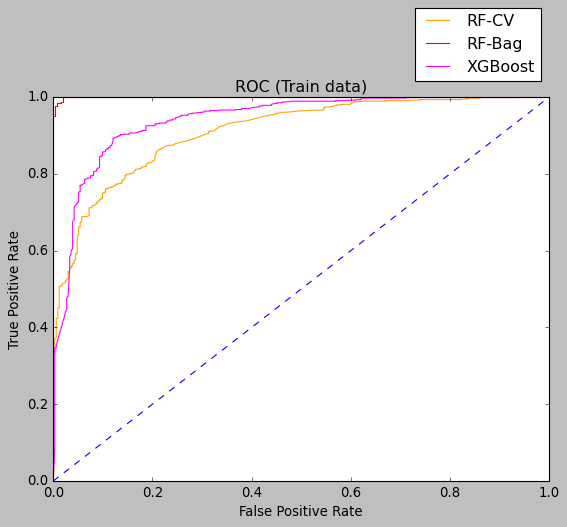

In [1441]:
plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(clfCVRF_train_fpr,clfCVRF_train_tpr,color='orange',label="RF-CV")
plt.plot(rfclf_train_fpr,rfclf_train_tpr,color='red',label="RF-Bag")
plt.plot(clfXGB_train_fpr,clfXGB_train_tpr,color='magenta',label="XGBoost")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Train data)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

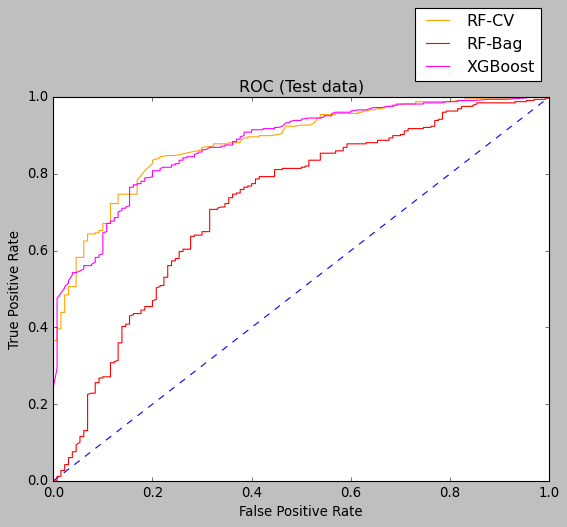

In [1442]:
plt.plot([0, 1], [0, 1], linestyle='--')


plt.plot(clfCVRF_test_fpr,clfCVRF_test_tpr,color='orange',label="RF-CV")
plt.plot(rfclf_test_fpr,rfclf_test_tpr,color='red',label="RF-Bag")
plt.plot(clfXGB_test_fpr,clfXGB_test_tpr,color='magenta',label="XGBoost")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test data)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [1444]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        
        'Tuning(RF) Train':[clfCVRF_train_acc,clfCVRF_train_auc,clfCVRF_train_recall,clfCVRF_train_precision,clfCVRF_train_f1],
        'Tuning(RF) Test':[clfCVRF_test_acc,clfCVRF_test_auc,clfCVRF_test_recall,clfCVRF_test_precision,clfCVRF_test_f1],
       'Bagging(RF) Train':[rfclf_train_acc,rfclf_train_auc,rfclf_train_recall,rfclf_train_precision,rfclf_train_f1],
        'Bagging(RF) Test':[rfclf_test_acc,rfclf_test_auc,rfclf_test_recall,rfclf_test_precision,rfclf_test_f1], 
        'XG-Boost Train':[clfXGB_train_acc,clfXGB_train_auc,clfXGB_train_recall,clfXGB_train_precision,clfXGB_train_f1],
        'XG-Boost Test':[clfXGB_test_acc,clfXGB_test_auc,clfXGB_test_recall,clfXGB_test_precision,clfXGB_test_f1]
                    },index=index)
round(data,2)

,Tuning(RF) Train,Tuning(RF) Test,Bagging(RF) Train,Bagging(RF) Test,XG-Boost Train,XG-Boost Test
Accuracy,0.84,0.82,0.99,0.72,0.89,0.81
AUC,0.91,0.88,1.00,0.72,0.94,0.88
Recall,0.91,0.88,0.98,0.99,0.93,0.85
Precision,0.87,0.87,0.99,0.72,0.91,0.88
F1 Score,0.89,0.87,0.99,0.84,0.92,0.87
